In [4]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.3 MB/s eta 0:00:00


In [14]:
import praw
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from datetime import datetime

reddit = praw.Reddit(
    client_id="4Jqs4g2mi2aoXSDZ76W7Kg",
    client_secret="BjjI2-srEd7Bh56hd3t1jUFrPFuFIQ",
    user_agent="my user agent",
)

In [15]:
print(reddit.read_only)

True


In [16]:
submissions_india = []

In [20]:

for submission in reddit.subreddit("India").new(limit=100):
    d={}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_india.append(d)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [21]:
india_top100 = pd.DataFrame(submissions_india)

In [22]:
india_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,16j00ne,Bi-Weekly Food and Recipes Thread,2,3,1.00,2023-09-15 01:30:11,self.india,0,0,False,AutoModerator
1,16juv7v,"Bi-Weekly Movies, TV Shows, Documentaries & Po...",1,3,1.00,2023-09-16 01:30:09,self.india,0,0,False,AutoModerator
2,16jgtg3,"""Don't wear red to weddings""?",105,416,0.88,2023-09-15 15:42:55,self.india,0,0,False,Middle-Silly
3,16j8oge,Passport office made a mistake 22 years ago an...,103,663,0.96,2023-09-15 09:36:21,self.india,0,0,False,alfah101
4,16j8scu,Unfortunate Incident at My Workplace,127,596,0.82,2023-09-15 09:42:48,self.india,0,0,False,gaanje007
...,...,...,...,...,...,...,...,...,...,...,...
195,16ja51l,Need career advice after a year long gap,1,1,0.99,2023-09-15 11:01:17,self.india,0,0,False,kadipatah
196,16ja2th,Justifying India being referred to as Bharat,26,0,0.29,2023-09-15 10:58:03,self.india,0,0,False,Sagar_Speedcuber
197,16j9xvs,McDonald's North & East India is better than M...,10,3,0.59,2023-09-15 10:50:01,self.india,0,0,False,akhandbharatvarshi
198,16j9uc9,"Analysis: To cut reliance on China, Russia tur...",1,5,0.86,2023-09-15 10:44:29,reuters.com,0,0,False,NewMeNewWorld


## Analysing the source of posts

In [25]:

pd.DataFrame(india_top100['domain'].value_counts()).head(n=10)

,domain
self.india,129
indianexpress.com,11
hindustantimes.com,5
economictimes.indiatimes.com,5
youtu.be,5
i.redd.it,4
scroll.in,4
moneycontrol.com,4
twitter.com,2
reuters.com,2


## Analysing authors of top posts

In [26]:

india_top100.author.value_counts()

HindiHeinHum            7
NewMeNewWorld           6
Little_Fox4501          4
Consistent-Figure820    4
iamsidsilver            4
                       ..
gaanje007               1
alfah101                1
xugan97                 1
PirateTraditional715    1
akhandbharatvarshi      1
Name: author, Length: 108, dtype: int64

In [27]:
df = pd.DataFrame(india_top100.author.value_counts().loc[lambda x:x>1])
df

,author
HindiHeinHum,7
NewMeNewWorld,6
Little_Fox4501,4
Consistent-Figure820,4
iamsidsilver,4
...,...
sachinr07,2
bhynot,2
mac201210,2
kraken_enrager,2


In [28]:
df['author'].sum()

165

In [29]:
df.describe()

,author
count,73.000000
mean,2.260274
std,0.850284
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,7.000000


In [30]:
india_top100.loc[india_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author


## Graphs

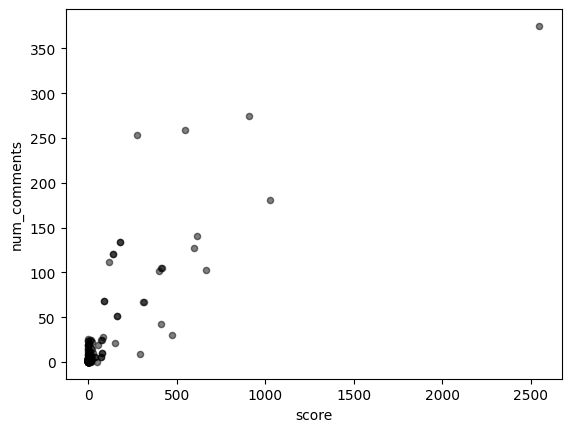

In [31]:
ax1 = india_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

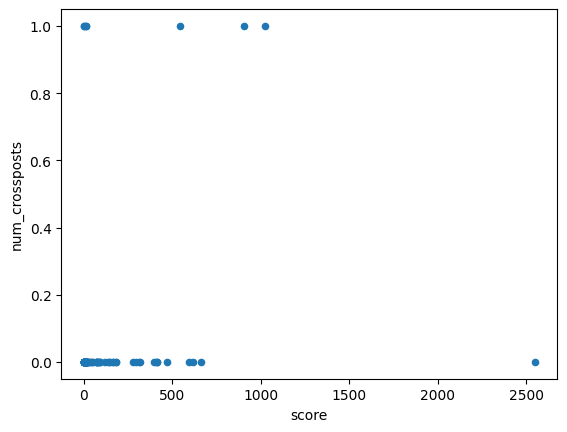

In [32]:
ax2 = india_top100.plot.scatter(x='score',y='num_crossposts')

## r/politics subreddit

In [33]:
politics = reddit.subreddit('politics')

In [34]:
submissions_politics = []

In [35]:
for submission in politics.top('year',limit=100):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_politics.append(d)

<ipython-input-35-43a13b0fd021>:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  for submission in politics.top('year',limit=100):
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [36]:
politics_top100 = pd.DataFrame(submissions_politics)

In [37]:
politics_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,yqa3cg,"John Fetterman wins Pennsylvania Senate race, ...",5082,112892,0.87,2022-11-09 05:52:05,nbcnews.com,4,11,False,He-is
1,12dna0j,Ocasio-Cortez calls for Thomas impeachment aft...,3395,104220,0.88,2023-04-06 15:11:49,thehill.com,1,12,False,Gato1980
2,yvjde7,Democrat Katie Hobbs defeats MAGA favorite Kar...,4400,103813,0.86,2022-11-15 01:48:48,nbcnews.com,2,9,False,slaysia
3,11mgaw2,Biden to propose 25% billionaire tax,6046,99197,0.92,2023-03-09 02:38:23,axios.com,0,13,False,bhodrolok
4,xfaqpa,The US is moving one step closer to letting Am...,2992,99072,0.95,2022-09-15 23:02:50,businessinsider.com,2,7,False,reftheloop
...,...,...,...,...,...,...,...,...,...,...,...
95,12u4ff2,Outrage as Florida Republicans pass ‘fascist’ ...,5813,57241,0.85,2023-04-21 14:42:07,independent.co.uk,0,21,False,Ardielley
96,111iwem,Marjorie Taylor Greene mocked for gushing over...,2777,57198,0.90,2023-02-13 20:21:04,independent.co.uk,0,5,False,theindependentonline
97,z3nem2,Herschel Walker Committed 'Election Fraud' Wit...,1927,57130,0.91,2022-11-24 15:53:37,newsweek.com,1,8,False,UWCG
98,xgxkc1,Ted Cruz forced to admit trafficking migrants ...,3468,56859,0.89,2022-09-17 21:01:51,independent.co.uk,1,7,False,gotostep2


## Analysing the source of posts

In [38]:
pd.DataFrame(politics_top100['domain'].value_counts()).head(n=10)

,domain
businessinsider.com,18
independent.co.uk,12
cnbc.com,8
nbcnews.com,7
thehill.com,7
thedailybeast.com,5
newsweek.com,4
self.politics,3
vice.com,3
huffpost.com,3


## Analysing authors of top posts

In [39]:
df1 = pd.DataFrame(politics_top100.author.value_counts().loc[lambda x:x>1])

In [40]:
df1

,author
Picture-unrelated,5
theindependentonline,5
mvanigan,4
Not Found,3
PoliticsModeratorBot,3
YourUncleBuck,2
Beckles28nz,2
UWCG,2
ReallyJustTheFacts,2
misana123,2


In [41]:
df1['author'].sum()

36

In [42]:
df1.describe()

,author
count,13.000000
mean,2.769231
std,1.165751
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


Here, we have 11 accounts with multiple posts in the top 10. These accounts have 31 posts between them.

In [43]:
politics_top100.loc[politics_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
20,za2las,Appeals court says FBI can use all documents s...,2099,80158,0.93,2022-12-01 22:43:58,independent.co.uk,3,10,False,Not Found
86,xf0os6,Trump threatens ‘big problems’ for US if he’s ...,7217,58161,0.87,2022-09-15 16:09:08,independent.co.uk,0,8,False,Not Found
89,yfw1z8,Paul Pelosi Is Undergoing Brain Surgery After ...,7541,58061,0.92,2022-10-28 18:04:01,people.com,0,16,False,Not Found


Here, we do not have any deleted account as the author for a top 100 post.

## Graphs

Just like before, we will plot graphs between some selected attributes to see whether any relationship can be deciphered.

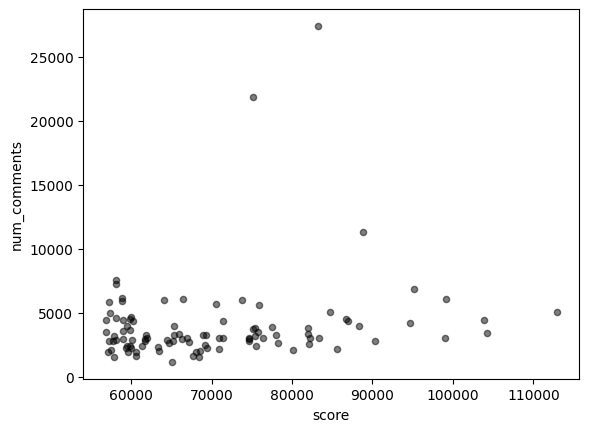

In [44]:
ax1 = politics_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

*score* vs *num_comments* shows even less linear relationship, as compared to the corresponding values in the India subreddit.

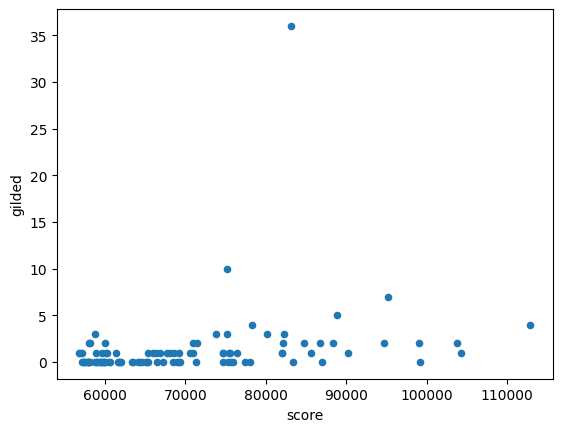

In [45]:
ax2 = politics_top100.plot.scatter(x='score',y='gilded')

Here we try a graph between *score* and *gilded*(no. of awards the post has received). Again, no clear relationship.

## Finding out commonly used words

In [46]:
import spacy

In [47]:
nlp = spacy.load("en_core_web_sm")

In [48]:
t = politics_top100['title'].to_list()

In [49]:
titles = nlp(str(t))

In [50]:
titles

['John Fetterman wins Pennsylvania Senate race, defeating TV doctor Mehmet Oz and flipping key state for Democrats', 'Ocasio-Cortez calls for Thomas impeachment after report of undisclosed gifts from GOP donor', 'Democrat Katie Hobbs defeats MAGA favorite Kari Lake in high-stakes race for governor in Arizona', 'Biden to propose 25% billionaire tax', 'The US is moving one step closer to letting Americans file their taxes online for free directly to the IRS, cutting out private companies like Turbotax and H&R Block', 'Democrats maintain control of Senate, NBC News projects, defeating many Trump-backed Republicans', "Bernie Sanders says it's time for a four-day work week", 'North Dakota senators vote to boost their own meal reimbursements after rejecting free school lunch bill', 'Megathread: Biden Pardoning All Federal Marijuana Possession Offenses and Initatiating Process to Federally Re-Schedule Marijuana', 'Parent Calls Bible ‘Porn’ and Demands Utah School District Remove It From Libra

We have converted the list of titles into a spacy object. Now using spacy, we will find out the most common Proper Nouns which appear in the post titles. That will give us an idea about the most popular topics.

In [51]:
words = [token.text for token in titles if not token.is_stop and not token.is_punct and token.pos_ == "PROPN"]

In [52]:
from collections import Counter

In [53]:
word_freq = Counter(words)

In [54]:
common_words = word_freq.most_common(10)

In [55]:
common_words

[('Trump', 16),
 ('Biden', 10),
 ('House', 8),
 ('Thomas', 7),
 ('Republicans', 7),
 ('Supreme', 7),
 ('Court', 7),
 ('Senate', 6),
 ('GOP', 6),
 ('DeSantis', 6)]

In [56]:
a,b = zip(*common_words)

In [57]:
import numpy as np

In [58]:
a = np.array(a)
b = np.array(b)

In [59]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Top 10 commonly used words')

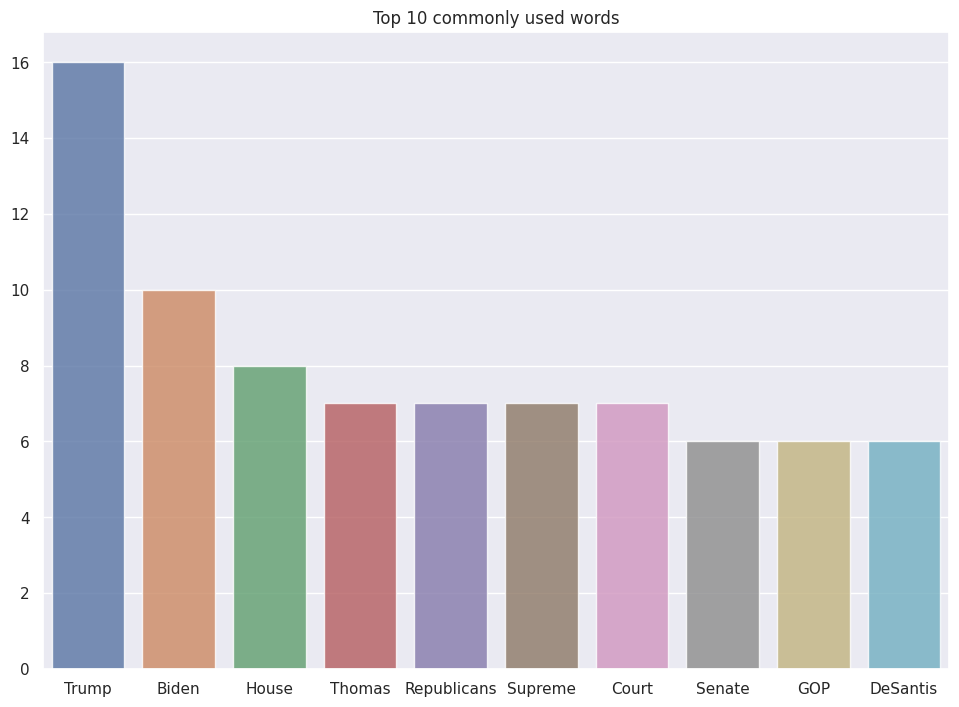

In [62]:
sb.barplot(x=a,y=b,alpha=0.8).set_title('Top 10 commonly used words')

## Comparing both subreddits

Finally, we will use the describe() on the top 100 dataframes of each subreddit, and compare the descriptive statistics thus obtained.

In [63]:
india_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,200.000000,200.000000,200.000000,200.0,200.000000
mean,19.715000,64.270000,0.717650,0.0,0.035000
std,49.895909,229.953561,0.222064,0.0,0.184241
min,0.000000,0.000000,0.170000,0.0,0.000000
25%,1.000000,0.000000,0.500000,0.0,0.000000
50%,3.000000,2.000000,0.720000,0.0,0.000000
75%,10.250000,14.000000,0.920000,0.0,0.000000
max,375.000000,2547.000000,1.000000,0.0,1.000000


In [64]:
politics_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,3965.62000,70387.820000,0.889700,1.330000,12.010000
std,3370.27398,12535.467317,0.045803,3.821933,5.470758
min,1150.00000,56833.000000,0.700000,0.000000,3.000000
25%,2588.00000,59876.000000,0.877500,0.000000,8.000000
50%,3099.00000,67047.500000,0.900000,1.000000,11.000000
75%,4390.25000,76016.250000,0.920000,1.000000,15.000000
max,27411.00000,112892.000000,0.970000,36.000000,28.000000


**OBSERVATIONS**  
  
1. In absolute numbers, r/politics is easily ahead. The mean number of comments, and mean score is more than 10 times that of a post in r/india.  
2. However, the top posts in r/India have a better mean upvote ratio than that is r/politics. It might be because a political subreddit will have a more polarized userbase, and thus more downvotes.  

In [ ]:
politics = reddit.subreddit('politics')

In [ ]:
submissions_politics = []

In [ ]:
for submission in politics.top('year',limit=100):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_politics.append(d)

In [ ]:
politics_top100 = pd.DataFrame(submissions_politics)

In [ ]:
politics_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,jptq5n,Megathread: Joe Biden Projected to Defeat Pres...,83190,214319,0.88,2020-11-07 21:58:04,self.politics,319,28,False,PoliticsModeratorBot
1,krntg6,Mitch McConnell Will Lose Control Of The Senat...,10297,156595,0.91,2021-01-06 18:55:44,buzzfeednews.com,42,20,False,klawdz
2,i9161a,AOC challenges Trump to release his college tr...,7957,153240,0.93,2020-08-13 20:15:08,independent.co.uk,5,20,False,ohnoh18
3,l1k8xa,"Biden signs federal mask mandate, repeals Musl...",6100,136690,0.84,2021-01-21 03:58:55,independent.co.uk,4,9,False,ohnoh18
4,jcm5dz,Trump Threatens to ‘Leave the Country’ if He L...,16368,135308,0.89,2020-10-17 06:38:58,thedailybeast.com,15,32,False,ONE-OF-THREE
...,...,...,...,...,...,...,...,...,...,...,...
95,krzt11,Remove Trump Tonight,3586,94213,0.84,2021-01-07 04:45:37,theatlantic.com,15,6,False,treetyoselfcarol
96,im2uc1,Trump: Americans Who Died in War Are ‘Losers’ ...,7941,94076,0.85,2020-09-04 03:08:26,theatlantic.com,20,45,False,HabitRage
97,kkqkxx,"She Noticed $200 Million Missing, Then She Was...",1526,94030,0.94,2020-12-27 03:12:48,propublica.org,2,18,False,Helicase21
98,gy4g9w,George W. Bush won't support Donald Trump’s re...,4229,93983,0.88,2020-06-07 08:12:45,texastribune.org,0,20,False,salvorhardin_BE


## Analysing the source of posts

In [ ]:
pd.DataFrame(politics_top100['domain'].value_counts()).head(n=10)

,domain
independent.co.uk,23
newsweek.com,12
self.politics,7
commondreams.org,7
businessinsider.com,5
thehill.com,4
washingtonpost.com,4
buzzfeednews.com,3
theatlantic.com,3
thedailybeast.com,2


## Analysing authors of top posts

In [ ]:
df1 = pd.DataFrame(politics_top100.author.value_counts().loc[lambda x:x>1])

In [ ]:
df1

,author
PoliticsModeratorBot,7
ohnoh18,4
grepnork,3
slaysia,3
Twoweekswithpay,2
DaFunkJunkie,2
theladynora,2
Plymouth03,2
hildebrand_rarity,2
theindependentonline,2


In [ ]:
df1['author'].sum()

31

In [ ]:
df1.describe()

,author
count,11.000000
mean,2.818182
std,1.537412
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,7.000000


Here, we have 11 accounts with multiple posts in the top 10. These accounts have 31 posts between them.

In [ ]:
politics_top100.loc[politics_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author


Here, we do not have any deleted account as the author for a top 100 post.

## Graphs

Just like before, we will plot graphs between some selected attributes to see whether any relationship can be deciphered.

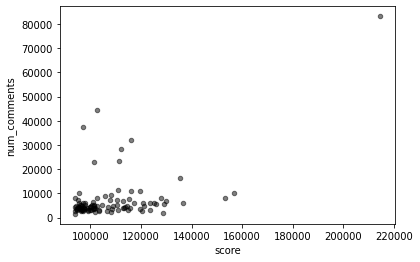

In [ ]:
ax1 = politics_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

*score* vs *num_comments* shows even less linear relationship, as compared to the corresponding values in the India subreddit.

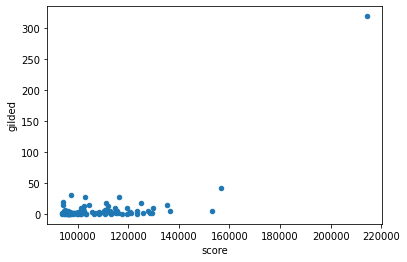

In [ ]:
ax2 = politics_top100.plot.scatter(x='score',y='gilded')

Here we try a graph between *score* and *gilded*(no. of awards the post has received). Again, no clear relationship.

## Finding out commonly used words

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
t = politics_top100['title'].to_list()

In [ ]:
titles = nlp(str(t))

In [ ]:
titles

['Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election', 'Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs', "AOC challenges Trump to release his college transcript after he called her a 'poor student' on Fox News | 'You release your college transcript, I’ll release mine, and we’ll see who was the better student. Loser has to fund the Post Office,' New York congresswoman tweets", 'Biden signs federal mask mandate, repeals Muslim Ban, and rejoins Paris Climate Agreement', 'Trump Threatens to ‘Leave the Country’ if He Loses to Biden', 'Demands for Kushner to Resign Over \'Staggering\' Level of \'Depravity\' That Put Politics Before Public Health. "Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus."', 'Over A million people sign petition calling for KKK to be declared a ter

We have converted the list of titles into a spacy object. Now using spacy, we will find out the most common Proper Nouns which appear in the post titles. That will give us an idea about the most popular topics.

In [ ]:
words = [token.text for token in titles if not token.is_stop and not token.is_punct and token.pos_ == "PROPN"]

In [ ]:
from collections import Counter

In [ ]:
word_freq = Counter(words)

In [ ]:
common_words = word_freq.most_common(10)

In [ ]:
common_words

[('Trump', 30),
 ('Biden', 21),
 ('Georgia', 9),
 ('President', 8),
 ('Donald', 8),
 ('Democrats', 7),
 ('House', 6),
 ('Capitol', 6),
 ('Joe', 5),
 ('Senate', 5)]

In [ ]:
a,b = zip(*common_words)

In [ ]:
import numpy as np

In [ ]:
a = np.array(a)
b = np.array(b)

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 commonly used words')

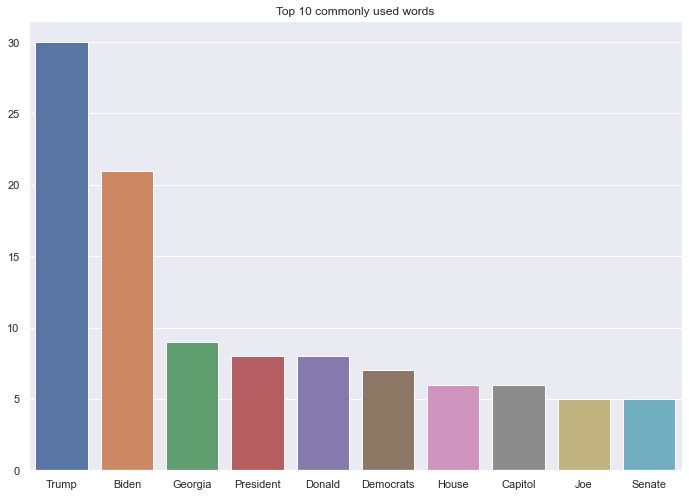

In [ ]:
sb.barplot(a,b).set_title('Top 10 commonly used words')

## Comparing both subreddits

Finally, we will use the describe() on the top 100 dataframes of each subreddit, and compare the descriptive statistics thus obtained.

In [ ]:
india_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,506.770000,9002.510000,0.947500,0.390000,5.790000
std,336.897246,3945.313808,0.029996,1.144993,10.430428
min,94.000000,6148.000000,0.860000,0.000000,0.000000
25%,305.000000,6725.250000,0.930000,0.000000,2.000000
50%,427.000000,7603.500000,0.950000,0.000000,3.500000
75%,579.750000,9678.750000,0.970000,0.000000,6.000000
max,1873.000000,36333.000000,0.990000,8.000000,92.000000


In [ ]:
politics_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,7454.450000,107926.820000,0.873200,7.670000,15.220000
std,10362.281869,16665.785787,0.037789,32.264705,8.475252
min,1526.000000,93962.000000,0.770000,0.000000,1.000000
25%,3580.000000,97040.000000,0.850000,0.750000,9.000000
50%,4633.000000,101916.000000,0.875000,2.000000,13.500000
75%,6640.750000,113755.500000,0.900000,5.000000,20.250000
max,83190.000000,214319.000000,0.940000,319.000000,45.000000


**OBSERVATIONS**  
  
1. In absolute numbers, r/politics is easily ahead. The mean number of comments, and mean score is more than 10 times that of a post in r/india.  
2. However, the top posts in r/India have a better mean upvote ratio than that is r/politics. It might be because a political subreddit will have a more polarized userbase, and thus more downvotes.  

In [ ]:
politics = reddit.subreddit('politics')

In [ ]:
submissions_politics = []

In [ ]:
for submission in politics.top('year',limit=100):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['date'] = datetime.fromtimestamp(submission.created_utc)
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    try:
        d['author'] = submission.author.name
    except:
        d['author'] = 'Not Found'
    submissions_politics.append(d)

In [ ]:
politics_top100 = pd.DataFrame(submissions_politics)

In [ ]:
politics_top100

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author
0,jptq5n,Megathread: Joe Biden Projected to Defeat Pres...,83190,214319,0.88,2020-11-07 21:58:04,self.politics,319,28,False,PoliticsModeratorBot
1,krntg6,Mitch McConnell Will Lose Control Of The Senat...,10297,156595,0.91,2021-01-06 18:55:44,buzzfeednews.com,42,20,False,klawdz
2,i9161a,AOC challenges Trump to release his college tr...,7957,153240,0.93,2020-08-13 20:15:08,independent.co.uk,5,20,False,ohnoh18
3,l1k8xa,"Biden signs federal mask mandate, repeals Musl...",6100,136690,0.84,2021-01-21 03:58:55,independent.co.uk,4,9,False,ohnoh18
4,jcm5dz,Trump Threatens to ‘Leave the Country’ if He L...,16368,135308,0.89,2020-10-17 06:38:58,thedailybeast.com,15,32,False,ONE-OF-THREE
...,...,...,...,...,...,...,...,...,...,...,...
95,krzt11,Remove Trump Tonight,3586,94213,0.84,2021-01-07 04:45:37,theatlantic.com,15,6,False,treetyoselfcarol
96,im2uc1,Trump: Americans Who Died in War Are ‘Losers’ ...,7941,94076,0.85,2020-09-04 03:08:26,theatlantic.com,20,45,False,HabitRage
97,kkqkxx,"She Noticed $200 Million Missing, Then She Was...",1526,94030,0.94,2020-12-27 03:12:48,propublica.org,2,18,False,Helicase21
98,gy4g9w,George W. Bush won't support Donald Trump’s re...,4229,93983,0.88,2020-06-07 08:12:45,texastribune.org,0,20,False,salvorhardin_BE


## Analysing the source of posts

In [ ]:
pd.DataFrame(politics_top100['domain'].value_counts()).head(n=10)

,domain
independent.co.uk,23
newsweek.com,12
self.politics,7
commondreams.org,7
businessinsider.com,5
thehill.com,4
washingtonpost.com,4
buzzfeednews.com,3
theatlantic.com,3
thedailybeast.com,2


## Analysing authors of top posts

In [ ]:
df1 = pd.DataFrame(politics_top100.author.value_counts().loc[lambda x:x>1])

In [ ]:
df1

,author
PoliticsModeratorBot,7
ohnoh18,4
grepnork,3
slaysia,3
Twoweekswithpay,2
DaFunkJunkie,2
theladynora,2
Plymouth03,2
hildebrand_rarity,2
theindependentonline,2


In [ ]:
df1['author'].sum()

31

In [ ]:
df1.describe()

,author
count,11.000000
mean,2.818182
std,1.537412
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,7.000000


Here, we have 11 accounts with multiple posts in the top 10. These accounts have 31 posts between them.

In [ ]:
politics_top100.loc[politics_top100.author == 'Not Found']

,id,title,num_comments,score,upvote_ratio,date,domain,gilded,num_crossposts,nsfw,author


Here, we do not have any deleted account as the author for a top 100 post.

## Graphs

Just like before, we will plot graphs between some selected attributes to see whether any relationship can be deciphered.

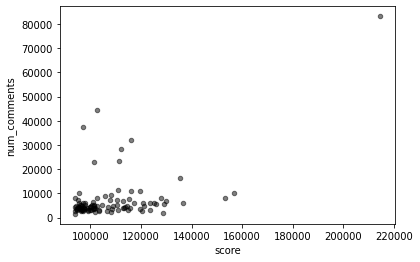

In [ ]:
ax1 = politics_top100.plot.scatter(x='score',y='num_comments',c='k',alpha=.5)

*score* vs *num_comments* shows even less linear relationship, as compared to the corresponding values in the India subreddit.

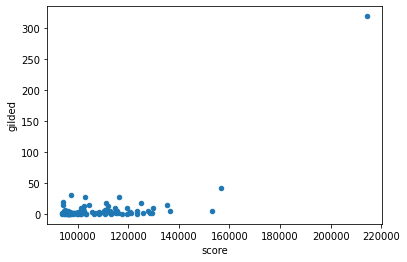

In [ ]:
ax2 = politics_top100.plot.scatter(x='score',y='gilded')

Here we try a graph between *score* and *gilded*(no. of awards the post has received). Again, no clear relationship.

## Finding out commonly used words

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
t = politics_top100['title'].to_list()

In [ ]:
titles = nlp(str(t))

In [ ]:
titles

['Megathread: Joe Biden Projected to Defeat President Donald Trump and Win the 2020 US Presidential Election', 'Mitch McConnell Will Lose Control Of The Senate As Democrats Have Swept The Georgia Runoffs', "AOC challenges Trump to release his college transcript after he called her a 'poor student' on Fox News | 'You release your college transcript, I’ll release mine, and we’ll see who was the better student. Loser has to fund the Post Office,' New York congresswoman tweets", 'Biden signs federal mask mandate, repeals Muslim Ban, and rejoins Paris Climate Agreement', 'Trump Threatens to ‘Leave the Country’ if He Loses to Biden', 'Demands for Kushner to Resign Over \'Staggering\' Level of \'Depravity\' That Put Politics Before Public Health. "Holy hell. Jared Kushner reportedly abandoned a national testing plan because it was *politically advantageous* to sit back and let blue states be eviscerated by the virus."', 'Over A million people sign petition calling for KKK to be declared a ter

We have converted the list of titles into a spacy object. Now using spacy, we will find out the most common Proper Nouns which appear in the post titles. That will give us an idea about the most popular topics.

In [ ]:
words = [token.text for token in titles if not token.is_stop and not token.is_punct and token.pos_ == "PROPN"]

In [ ]:
from collections import Counter

In [ ]:
word_freq = Counter(words)

In [ ]:
common_words = word_freq.most_common(10)

In [ ]:
common_words

[('Trump', 30),
 ('Biden', 21),
 ('Georgia', 9),
 ('President', 8),
 ('Donald', 8),
 ('Democrats', 7),
 ('House', 6),
 ('Capitol', 6),
 ('Joe', 5),
 ('Senate', 5)]

In [ ]:
a,b = zip(*common_words)

In [ ]:
import numpy as np

In [ ]:
a = np.array(a)
b = np.array(b)

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 commonly used words')

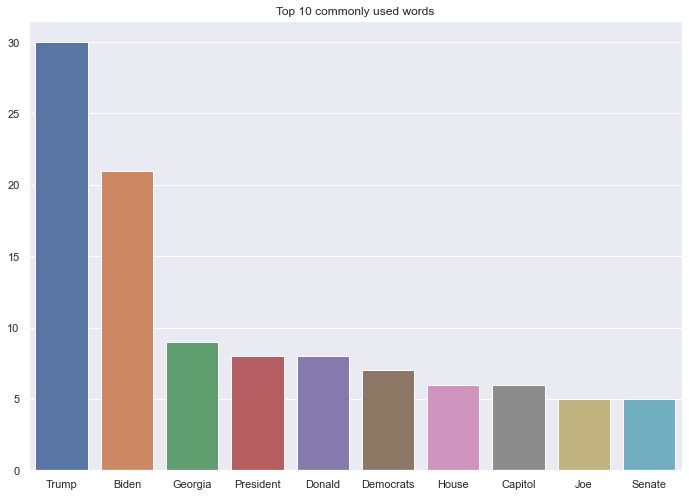

In [ ]:
sb.barplot(a,b).set_title('Top 10 commonly used words')

## Comparing both subreddits

Finally, we will use the describe() on the top 100 dataframes of each subreddit, and compare the descriptive statistics thus obtained.

In [ ]:
india_top100.describe()

,num_comments,score,upvote_ratio,gilded,num_crossposts
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,506.770000,9002.510000,0.947500,0.390000,5.790000
std,336.897246,3945.313808,0.029996,1.144993,10.430428
min,94.000000,6148.000000,0.860000,0.000000,0.000000
25%,305.000000,6725.250000,0.930000,0.000000,2.000000
50%,427.000000,7603.500000,0.950000,0.000000,3.500000
75%,579.750000,9678.750000,0.970000,0.000000,6.000000
max,1873.000000,36333.000000,0.990000,8.000000,92.000000


In [ ]:
politics_top100.describe()

: 

**OBSERVATIONS**  
  
1. In absolute numbers, r/politics is easily ahead. The mean number of comments, and mean score is more than 10 times that of a post in r/india.  
2. However, the top posts in r/India have a better mean upvote ratio than that is r/politics. It might be because a political subreddit will have a more polarized userbase, and thus more downvotes.  